In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
crimes_df = pd.read_csv("../data/DenverCrimesData.csv", parse_dates=["FIRST_OCCURRENCE_DATE", "LAST_OCCURRENCE_DATE", "REPORTED_DATE"])
neighborhoods_df = pd.read_csv("../data/DenverCensus2010.csv")

crimes_df['NEIGHBORHOOD_CLEAN'] = crimes_df['NEIGHBORHOOD_ID'].str.replace('-', ' ').str.title()

df = crimes_df.merge(neighborhoods_df, left_on="NEIGHBORHOOD_CLEAN", right_on="NAME", how="inner")

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_79567/519860083.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_df = pd.read_csv("../data/DenverCrimesData.csv", parse_dates=["FIRST_OCCURRENCE_DATE", "LAST_OCCURRENCE_DATE", "REPORTED_DATE"])


In [55]:
neighborhood_crimes_df = df.groupby(['NEIGHBORHOOD_CLEAN', 'OFFENSE_CATEGORY_ID']).size().reset_index(name="COUNT").sort_values(by=['NEIGHBORHOOD_CLEAN', "COUNT"], ascending=False).fillna(0)
neighborhood_crimes_df = neighborhood_crimes_df.merge(neighborhoods_df[['SUM_POPULATION_2010', 'NAME']], left_on="NEIGHBORHOOD_CLEAN", right_on='NAME')
neighborhood_crimes_df['OFFENSE_RATE_PER_1000'] = neighborhood_crimes_df['COUNT'] / neighborhood_crimes_df['SUM_POPULATION_2010'] * 1000

In [ ]:
pivot_df = neighborhood_crimes_df.pivot(index='NEIGHBORHOOD_CLEAN', columns="OFFENSE_CATEGORY_ID", values='OFFENSE_RATE_PER_1000').fillna(0)

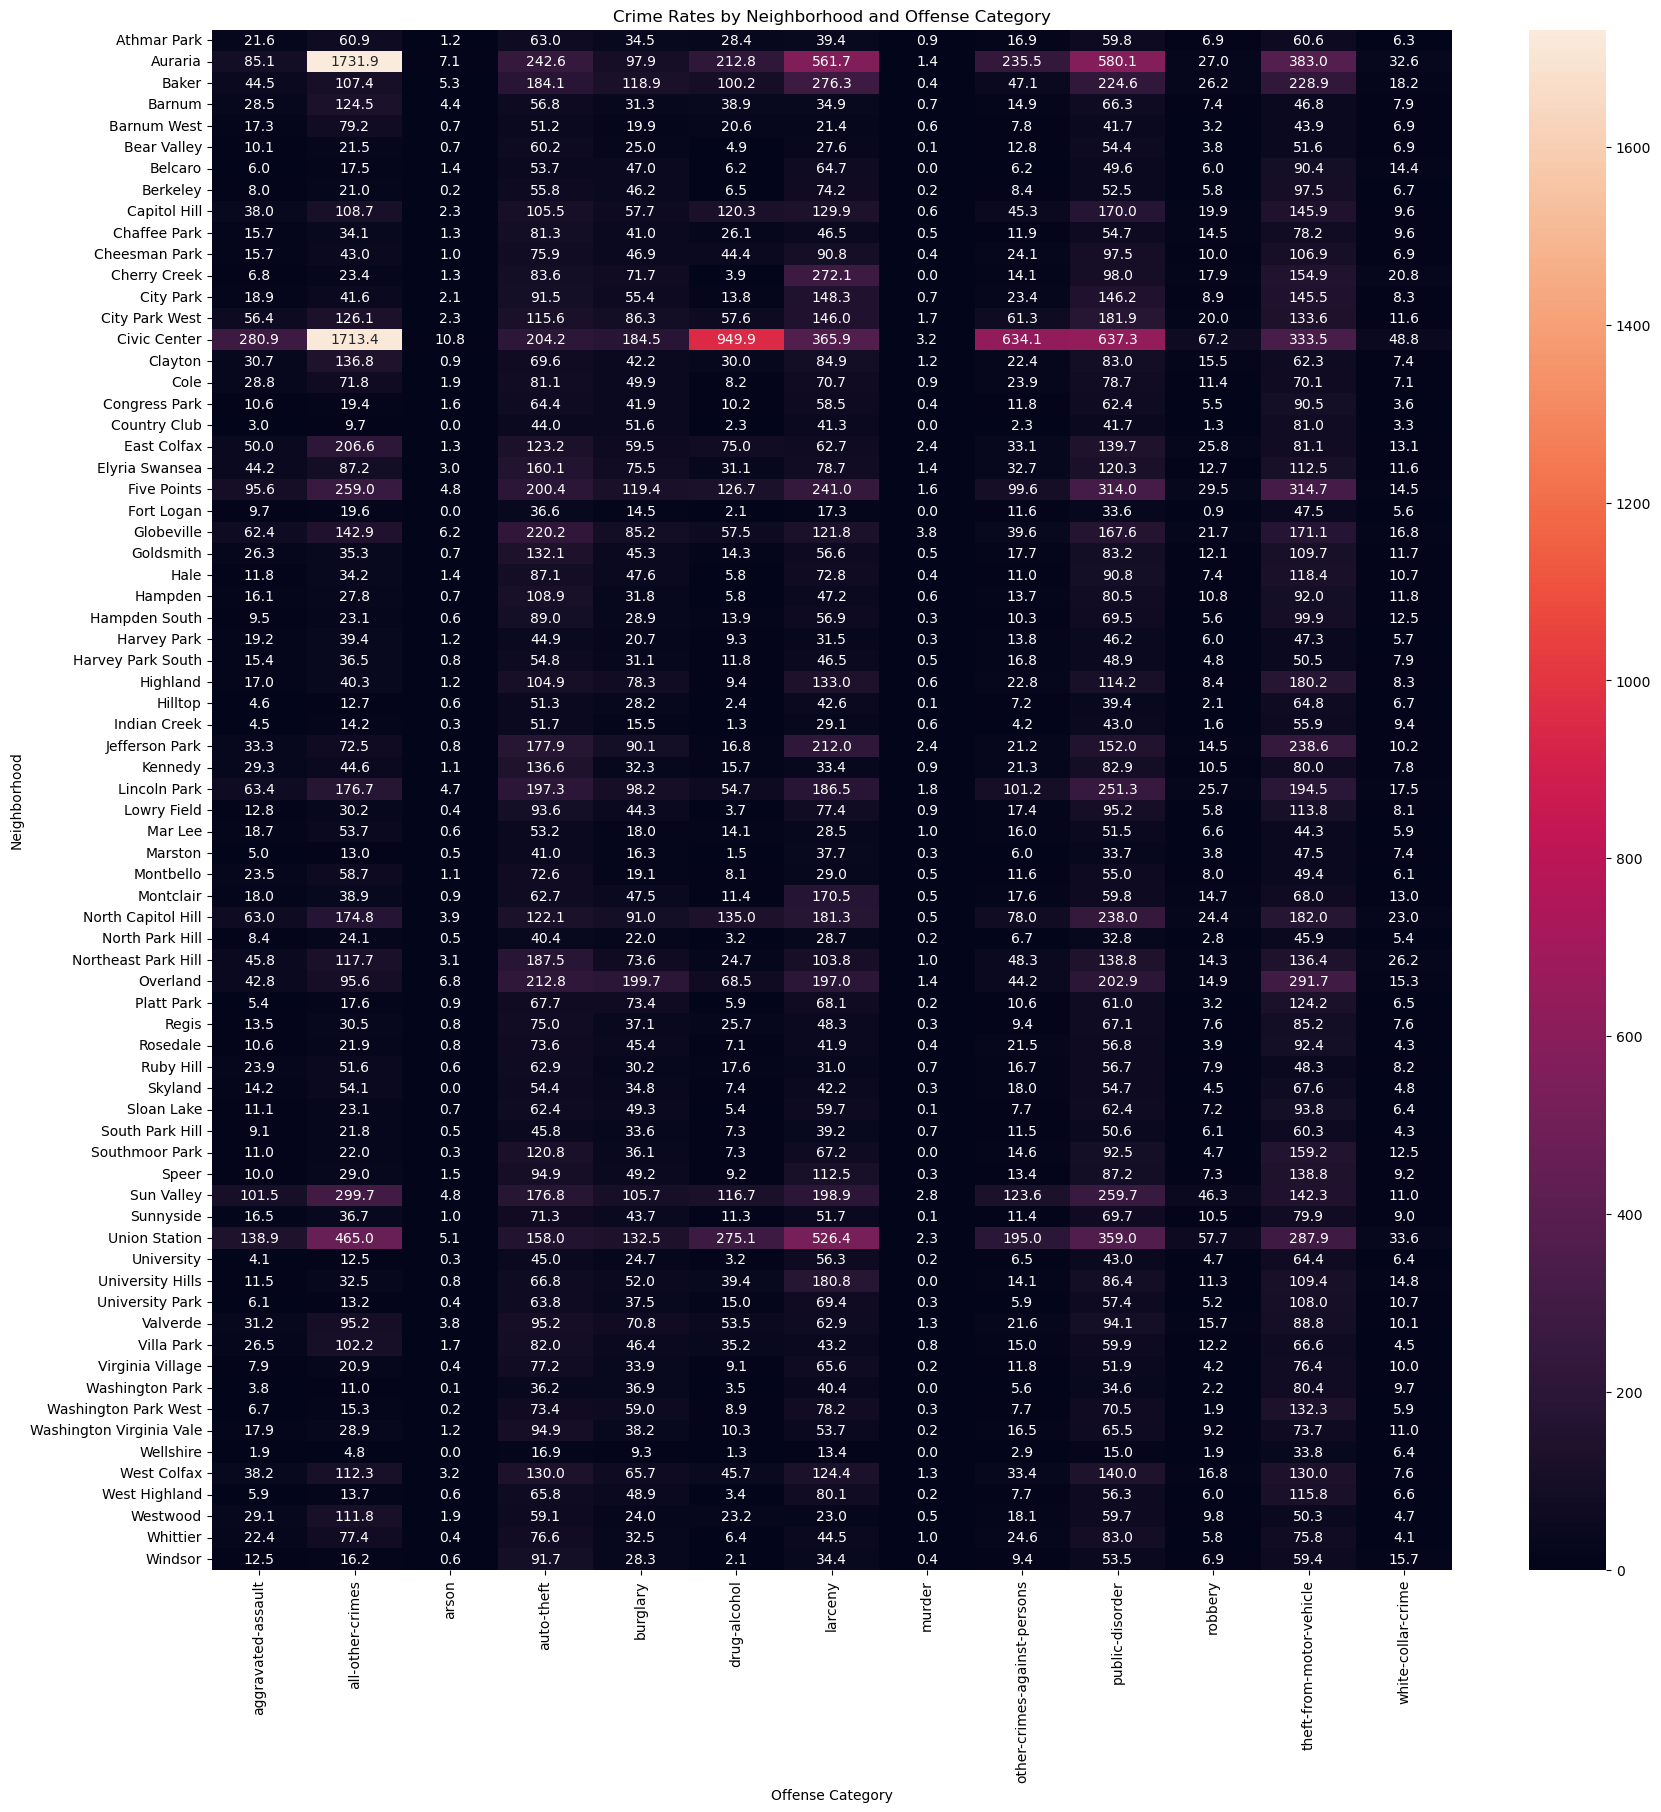

In [53]:
plt.figure(figsize=(20,20))

sns.heatmap(
  pivot_df, 
  annot=True,
  fmt=".1f"
)

plt.title("Crime Rates by Neighborhood and Offense Category")
plt.xlabel('Offense Category')
plt.ylabel('Neighborhood')
plt.show()